In [1]:
#Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

import re
import warnings # To mitigate any unwanted warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('G:/shg/Datasets/dataGaia_AB_train.csv')
data_train

,ID,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,1,1,44.375187,2.895901,1.400000e+15,1.8937,16.954,7.031,-15.427,10.369156,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
1,2,2,42.959304,2.920459,1.550000e+15,2.9732,2.528,1.795,1.780,10.038978,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
2,3,3,44.031079,3.203683,1.610000e+15,2.2337,10.776,-3.151,-10.305,9.810181,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
3,4,4,45.463599,3.138095,1.750000e+15,4.0179,10.053,1.828,9.885,8.163041,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A
4,5,5,43.784164,3.486814,2.060000e+15,11.6458,32.355,29.688,-12.863,6.855547,...,0.257051,NaN,7192.3,85.7073,2.0194,9.909233,1.647,1.288,0.459583,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148533,185667,85667,298.702986,20.698672,1.830000e+18,0.1195,6.579,-2.238,-6.186,16.553267,...,0.689776,NaN,11371.2,3914.1420,1.4630,33.170110,NaN,NaN,0.767987,B
148534,185668,85668,298.733458,20.773549,1.830000e+18,0.3125,5.957,-2.916,-5.195,12.213623,...,0.232495,NaN,11368.6,3850.1494,5.9593,322.454530,3.714,NaN,0.458303,B
148535,185670,85670,298.680593,20.771847,1.830000e+18,0.7751,4.654,-0.496,-4.628,11.795012,...,0.181243,NaN,10452.5,1470.3190,2.7549,56.091637,2.586,0.257,0.546456,B
148536,185671,85671,298.331890,20.654466,1.830000e+18,0.6775,1.002,1.001,0.058,14.703084,...,0.688147,NaN,14737.3,1968.8260,1.5400,53.701370,NaN,NaN,1.127581,B


In [3]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(data_train)
print(data_train.columns)

Index(['id', 'unnamed: 0', 'ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra',
       'pmde', 'gmag', 'e__gmag', 'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag',
       'grv_smag', 'e_grv_smag', 'bp-rp', 'bp-g', 'g-rp', 'pscol', 'teff',
       'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame',
       'sp_type-els'],
      dtype='object')


In [4]:
# Information about the dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148538 entries, 0 to 148537
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           148538 non-null  int64  
 1   unnamed: 0   148538 non-null  int64  
 2   ra_icrs      148538 non-null  float64
 3   de_icrs      148538 non-null  float64
 4   source       148538 non-null  float64
 5   plx          148538 non-null  float64
 6   pm           148538 non-null  float64
 7   pmra         148538 non-null  float64
 8   pmde         148538 non-null  float64
 9   gmag         148538 non-null  float64
 10  e__gmag      148538 non-null  float64
 11  b_pmag       148538 non-null  float64
 12  e_b_pmag     148538 non-null  float64
 13  r_pmag       148538 non-null  float64
 14  e_r_pmag     148538 non-null  float64
 15  grv_smag     84484 non-null   float64
 16  e_grv_smag   84484 non-null   float64
 17  bp-rp        148538 non-null  float64
 18  bp-g         148538 non-

#### Value Count Of Target Feature

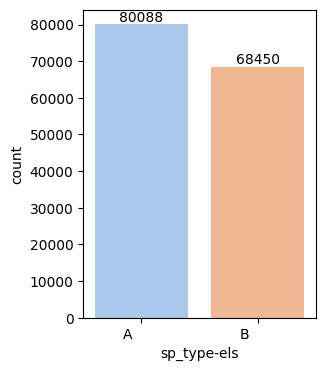

In [5]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='sp_type-els',data=data_train,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

## Data Pre-processing

### Analysis Missing Value

In [6]:
# Define the function to summarize missing values
def missing_values_table(data_train):
    # Total missing values
    mis_val = data_train.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * data_train.isnull().sum() / len(data_train)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(data_train.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
# Checking Missing and duplicates
train_missing= missing_values_table(data_train)
train_missing


Your selected dataframe has 29 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
pscol,143685,96.7
grv_smag,64054,43.1
e_grv_smag,64054,43.1
age-_flame,38016,25.6
mass-_flame,12551,8.4
lum-_flame,2995,2.0
z-_flame,2995,2.0


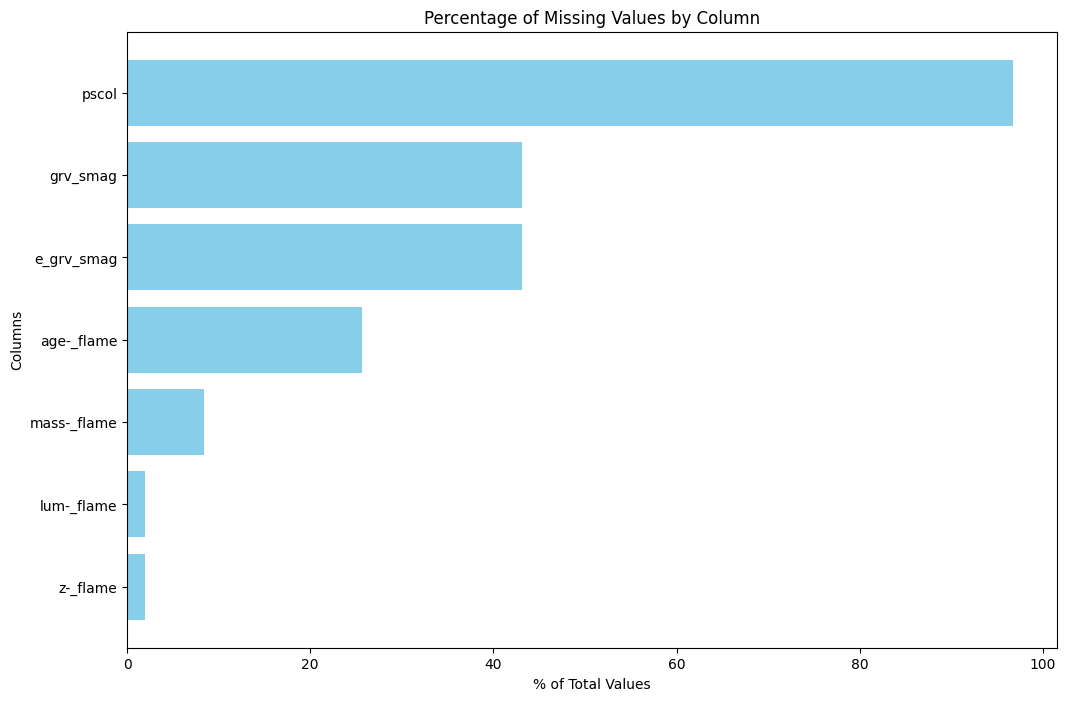

In [8]:
# Plotting the missing values
plt.figure(figsize=(12, 8))
plt.barh(train_missing.index, train_missing['% of Total Values'], color='skyblue')
plt.xlabel('% of Total Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
plt.gca().invert_yaxis()
plt.show()


#### Drop Column with Very High Missing Values (pscol),(grv_smag),(e_grv_smag):
Since pscol has 96.7% missing values, it might be best to drop this column. Also, the other two featues have higher missing values, thus dropped those column.

In [9]:
data_train.drop(columns=['pscol'], inplace=True)
data_train.drop(columns=['grv_smag'], inplace=True)
data_train.drop(columns=['e_grv_smag'], inplace=True)

In [10]:
data_train.drop(columns=['unnamed: 0'], inplace=True)

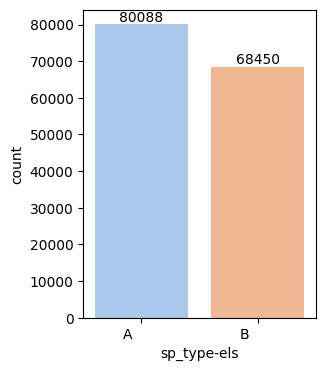

In [11]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='sp_type-els',data=data_train,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#### Handle Missing Value With using Rounded Mean

In [12]:
# List of columns to handle missing values
columns_to_handle = ['age-_flame', 'mass-_flame', 'lum-_flame', 'z-_flame']

# Handle missing values using the rounded mean
for col in columns_to_handle:
    mean_value = data_train[col].mean()
    rounded_mean_value = round(mean_value)
    data_train[col].fillna(rounded_mean_value, inplace=True)

# Verify the handling of missing values
print(data_train[columns_to_handle].isnull().sum())  # Should print 0 for all columns

age-_flame     0
mass-_flame    0
lum-_flame     0
z-_flame       0
dtype: int64


In [13]:
cl_train_data = data_train.copy()

In [14]:
cl_train_data.head(5)

,id,ra_icrs,de_icrs,source,plx,pm,pmra,pmde,gmag,e__gmag,...,bp-g,g-rp,teff,dist,rad,lum-_flame,mass-_flame,age-_flame,z-_flame,sp_type-els
0,1,44.375187,2.895901,1.400000e+15,1.8937,16.954,7.031,-15.427,10.369156,0.002801,...,0.072701,0.163792,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
1,2,42.959304,2.920459,1.550000e+15,2.9732,2.528,1.795,1.780,10.038978,0.002774,...,0.173778,0.304139,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
2,3,44.031079,3.203683,1.610000e+15,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,...,0.198277,0.338961,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
3,4,45.463599,3.138095,1.750000e+15,4.0179,10.053,1.828,9.885,8.163041,0.002800,...,0.034631,0.091842,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A
4,5,43.784164,3.486814,2.060000e+15,11.6458,32.355,29.688,-12.863,6.855547,0.002779,...,0.137993,0.257051,7192.3,85.7073,2.0194,9.909233,1.647,1.288,0.459583,A


### Identify Outlier

In [15]:
# Getting the numerical columns
num_cols = data_train.select_dtypes(include = ['number']).columns.tolist()
cat_cols = data_train.select_dtypes(include = ['object', 'category']).columns.tolist()

print(f'Numerical Columns: \n{num_cols}\n\nCategorical Columns: \n{cat_cols}')

Numerical Columns: 
['id', 'ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra', 'pmde', 'gmag', 'e__gmag', 'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag', 'bp-rp', 'bp-g', 'g-rp', 'teff', 'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame']

Categorical Columns: 
['sp_type-els']


In [16]:
# List of columns to check for outliers
columns_to_check = ['id','ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra', 'pmde', 'gmag', 'e__gmag',
                    'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag', 'bp-rp', 'bp-g', 'g-rp',
                    'teff', 'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame']

In [17]:
# Function to calculate IQR outliers
def iqr_outliers(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, col_outliers])
    return outliers

outliers_iqr = iqr_outliers(cl_train_data, columns_to_check)
print("Outliers identified using IQR method:")
print(outliers_iqr)


Outliers identified using IQR method:
            id     ra_icrs    de_icrs        source     plx      pm    pmra  \
60079    75023  359.392117 -39.678690  2.310000e+18  2.0013  15.387  10.771   
60080    75024  358.483514 -37.408092  2.310000e+18  3.6715  25.769  22.282   
60081    75025    3.849990 -36.718284  2.310000e+18  2.6816  17.862   8.844   
60082    75026    5.203269 -35.289944  2.310000e+18  1.7736   5.555   2.696   
60083    75027    0.852962 -35.965129  2.310000e+18  4.7894  23.222  22.291   
...        ...         ...        ...           ...     ...     ...     ...   
148505  185635  298.303712  20.288847  1.830000e+18 -1.1431   7.786  -3.069   
148514  185646  298.766827  20.273039  1.830000e+18  0.0156   4.522  -1.978   
148525  185658  299.034423  20.809526  1.830000e+18  0.4495   6.119  -5.508   
148536  185671  298.331890  20.654466  1.830000e+18  0.6775   1.002   1.001   
148537  185672  298.317344  20.678648  1.830000e+18  0.3751   3.568   0.482   

          pmd

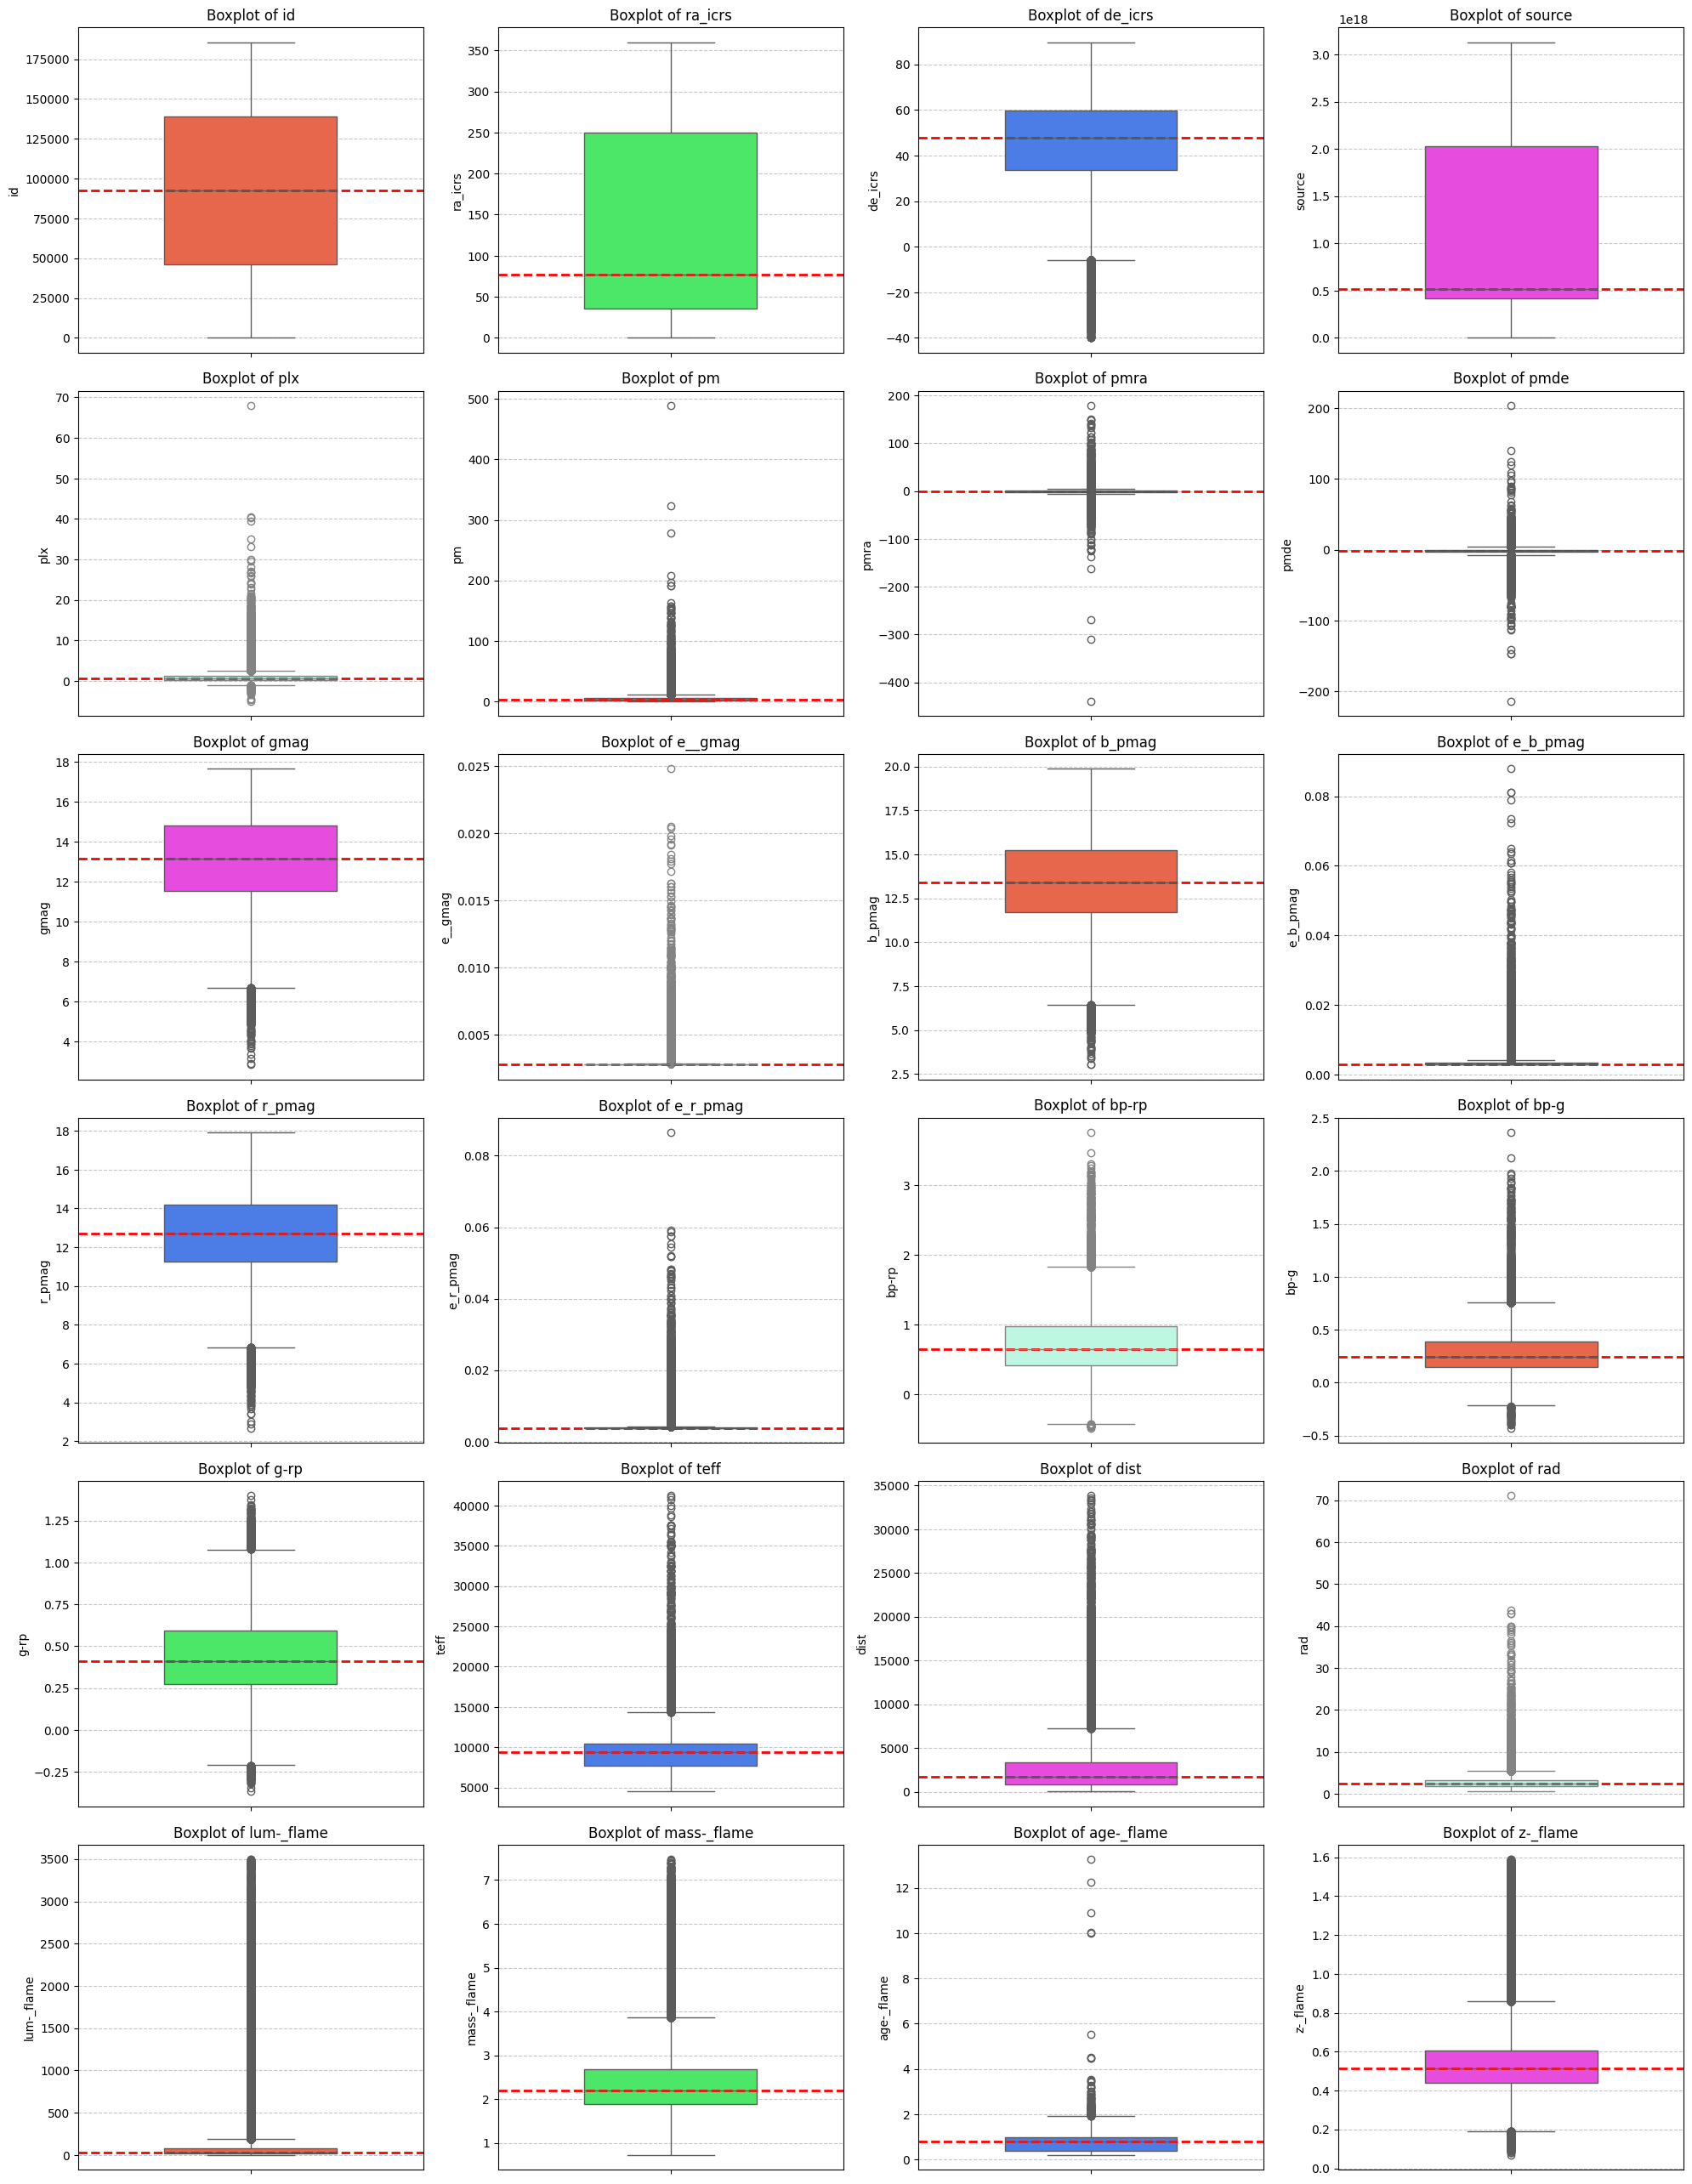

In [18]:
# Plotting the boxplots again to verify the removal of outliers
clr_map = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']
palette = sns.color_palette(clr_map * (len(columns_to_check) // len(clr_map) + 1))

plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(7, 4, i)  # Adjusting to a 7x4 grid for 26 columns
    sns.boxplot(y=cl_train_data[column], color=palette[i-1], width=0.5)
    plt.axhline(y=cl_train_data[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Romove Outlier

In [19]:
# List of columns to check for outliers
columns_to_check = ['de_icrs', 'plx', 'pm', 'pmra', 'pmde', 'gmag', 'e__gmag',
                    'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag', 'bp-rp', 'bp-g', 'g-rp',
                    'teff', 'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the IQR method
clean_data = remove_outliers_iqr(cl_train_data, columns_to_check)

# Verify the removal of outliers
print(clean_data.describe())

                  id       ra_icrs       de_icrs        source           plx  \
count   57870.000000  57870.000000  57870.000000  5.787000e+04  57870.000000   
mean    86889.437360    124.832593     45.079966  1.087637e+18      0.766897   
std     54199.982605    119.785099     19.281050  9.617634e+17      0.515771   
min        15.000000      0.000345     -5.881638  4.430000e+15     -0.010800   
25%     39547.750000     33.666951     37.758545  4.120000e+17      0.335300   
50%     92545.500000     75.453030     49.341631  5.100000e+17      0.614800   
75%    134252.750000    292.097280     59.466318  2.000000e+18      1.117600   
max    185670.000000    359.997541     88.863044  3.130000e+18      2.579000   

                 pm          pmra          pmde          gmag       e__gmag  \
count  57870.000000  57870.000000  57870.000000  57870.000000  57870.000000   
mean       2.758587     -0.644545     -1.706729     13.062524      0.002774   
std        1.657175      1.874663      1.8

In [20]:
rm_outlr_data = clean_data.copy()

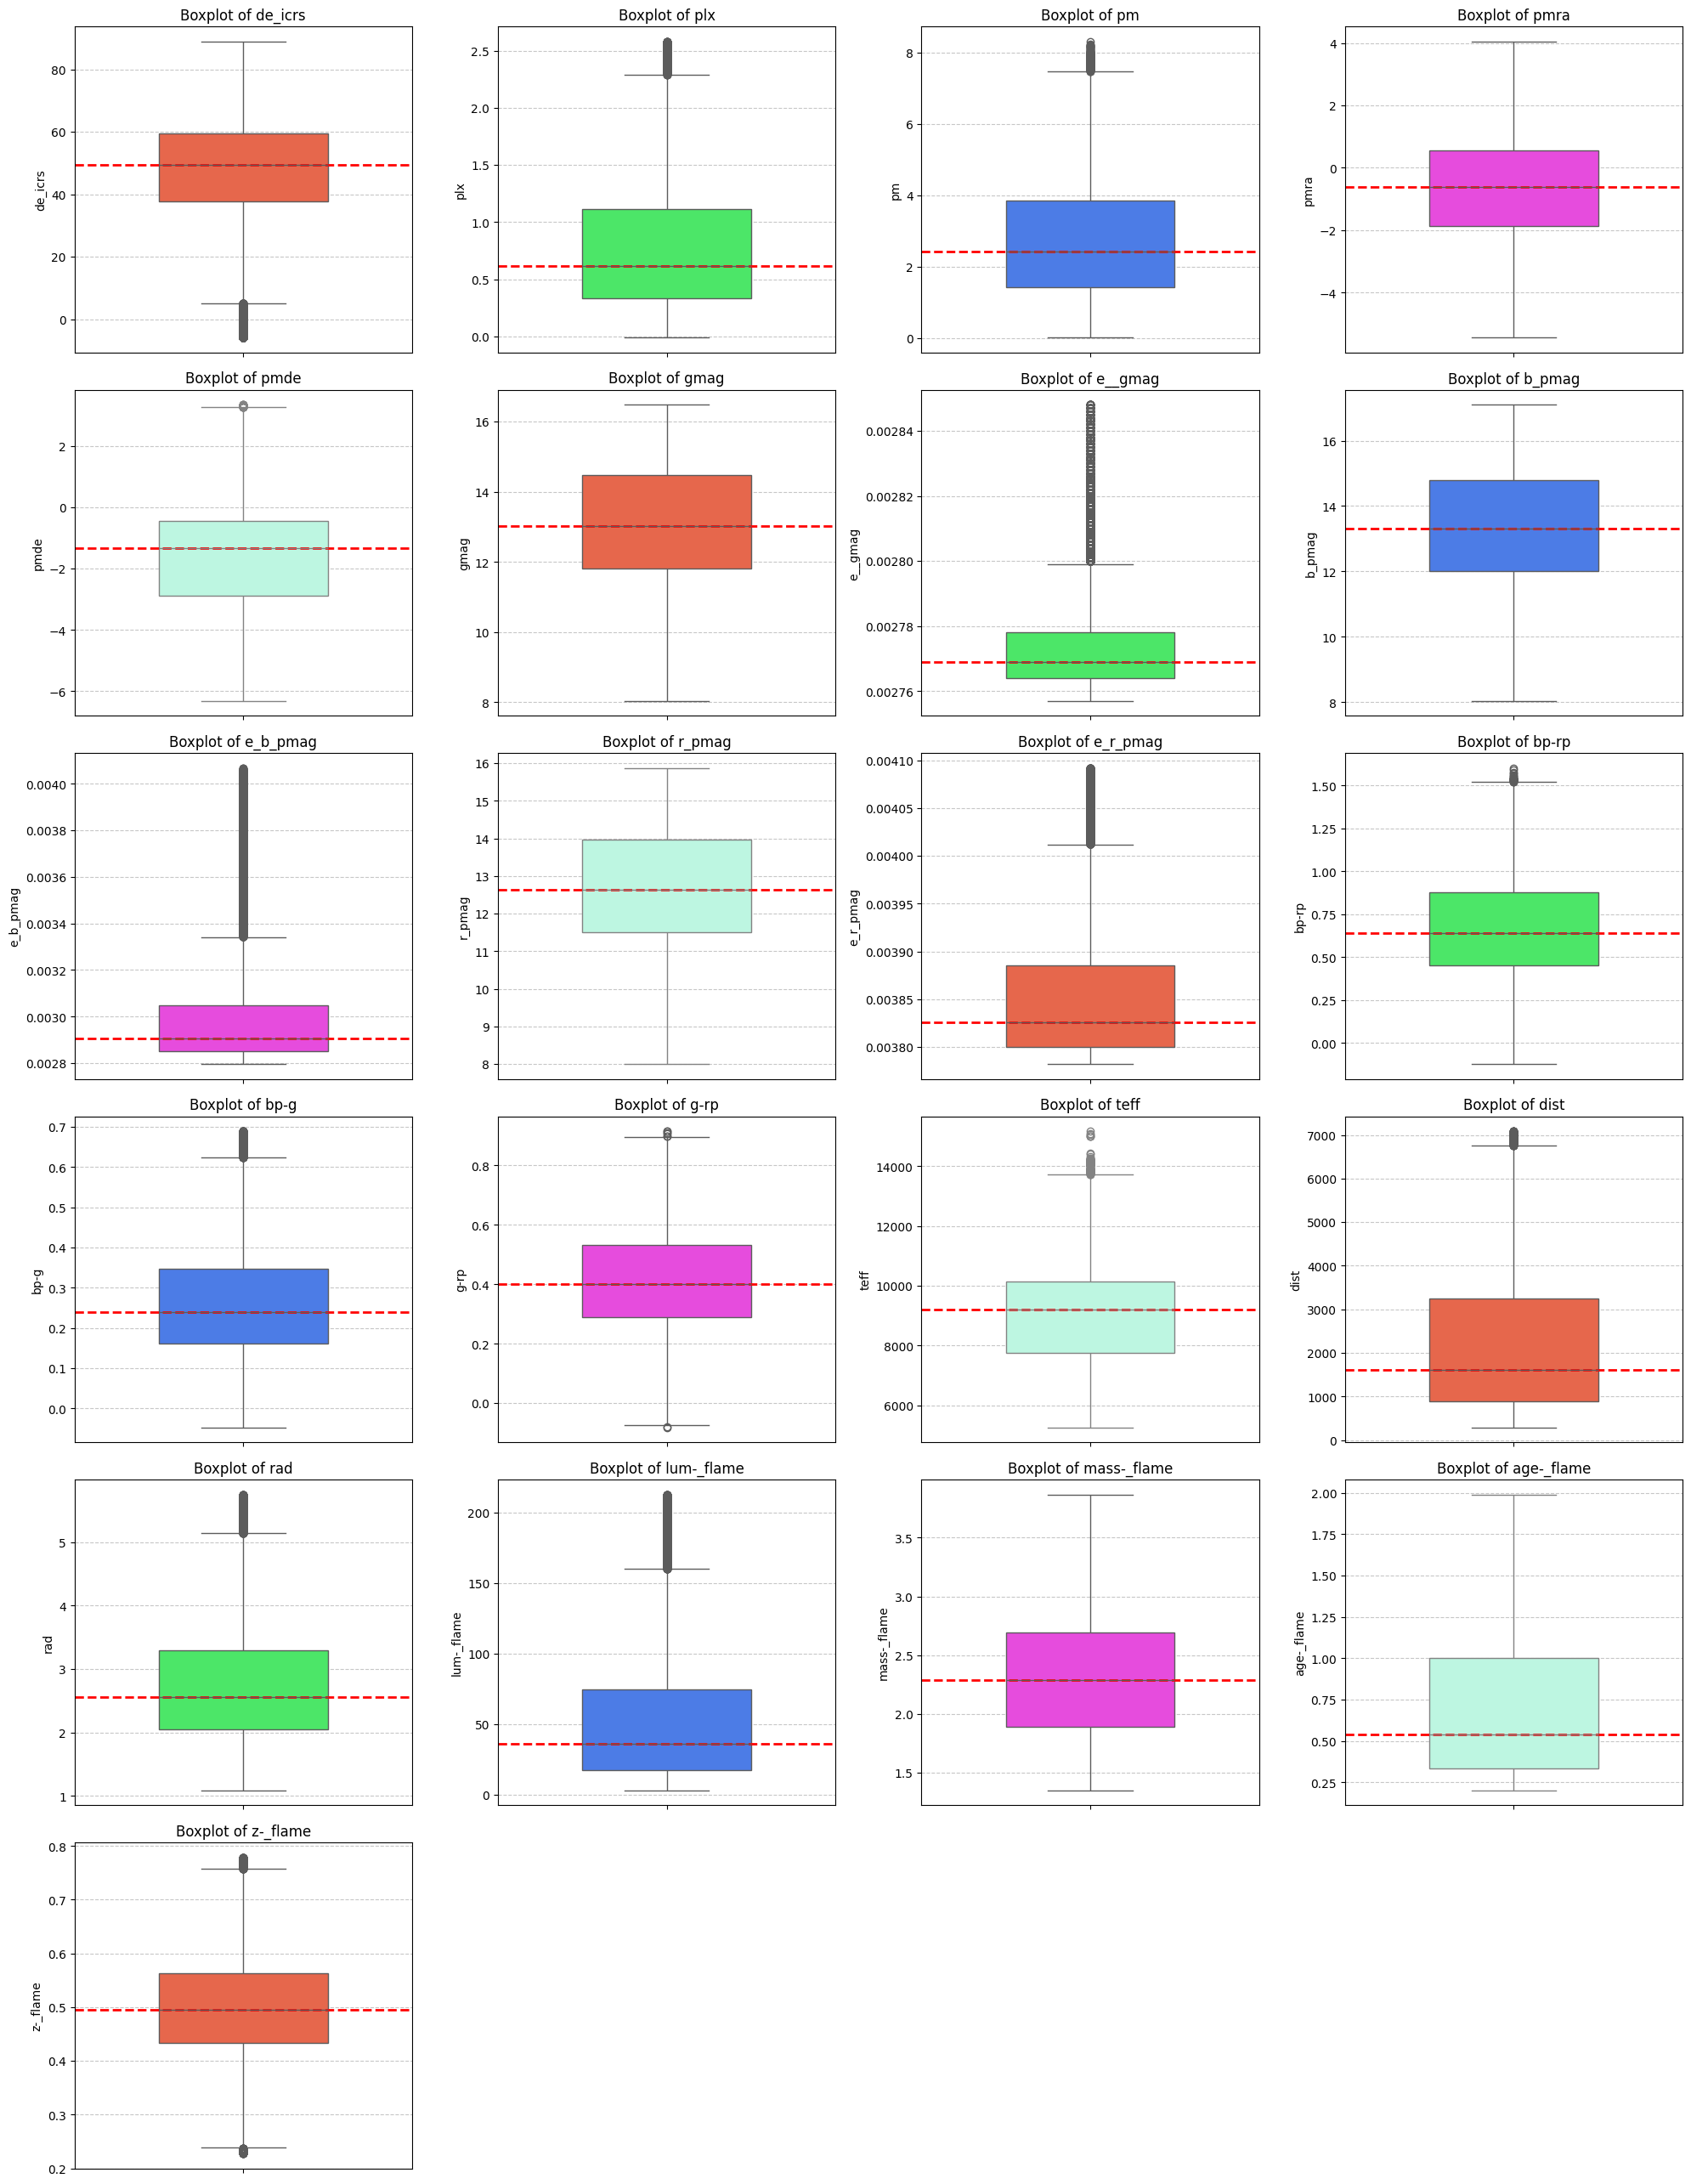

In [21]:
# Plotting the boxplots again to verify the removal of outliers
clr_map = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']
palette = sns.color_palette(clr_map * (len(columns_to_check) // len(clr_map) + 1))

plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(7, 4, i)  # Adjusting to a 7x4 grid for 26 columns
    sns.boxplot(y=rm_outlr_data[column], color=palette[i-1], width=0.5)
    plt.axhline(y=rm_outlr_data[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [22]:
from scipy import stats
import numpy as np
# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        df = df[(np.abs(stats.zscore(df[col])) < threshold)]
    return df

# Apply the Z-score method
clean_data_zscore = remove_outliers_zscore(clean_data, columns_to_check)

# Verify the removal of outliers
print(clean_data_zscore.describe())

                  id       ra_icrs       de_icrs        source           plx  \
count   51614.000000  51614.000000  51614.000000  5.161400e+04  51614.000000   
mean    85000.469330    127.572999     44.848954  1.111946e+18      0.781735   
std     53973.616644    121.083324     19.389026  9.682955e+17      0.496619   
min        15.000000      0.000345     -5.881638  4.430000e+15      0.002700   
25%     38205.750000     33.913281     37.410945  4.140000e+17      0.347200   
50%     90471.000000     76.332474     49.155619  5.110000e+17      0.658600   
75%    132605.500000    294.257261     59.247868  2.000000e+18      1.136975   
max    185670.000000    359.997541     88.863044  3.130000e+18      2.313800   

                 pm          pmra          pmde          gmag       e__gmag  \
count  51614.000000  51614.000000  51614.000000  51614.000000  51614.000000   
mean       2.799158     -0.630034     -1.744262     12.978882      0.002772   
std        1.643460      1.886054      1.8

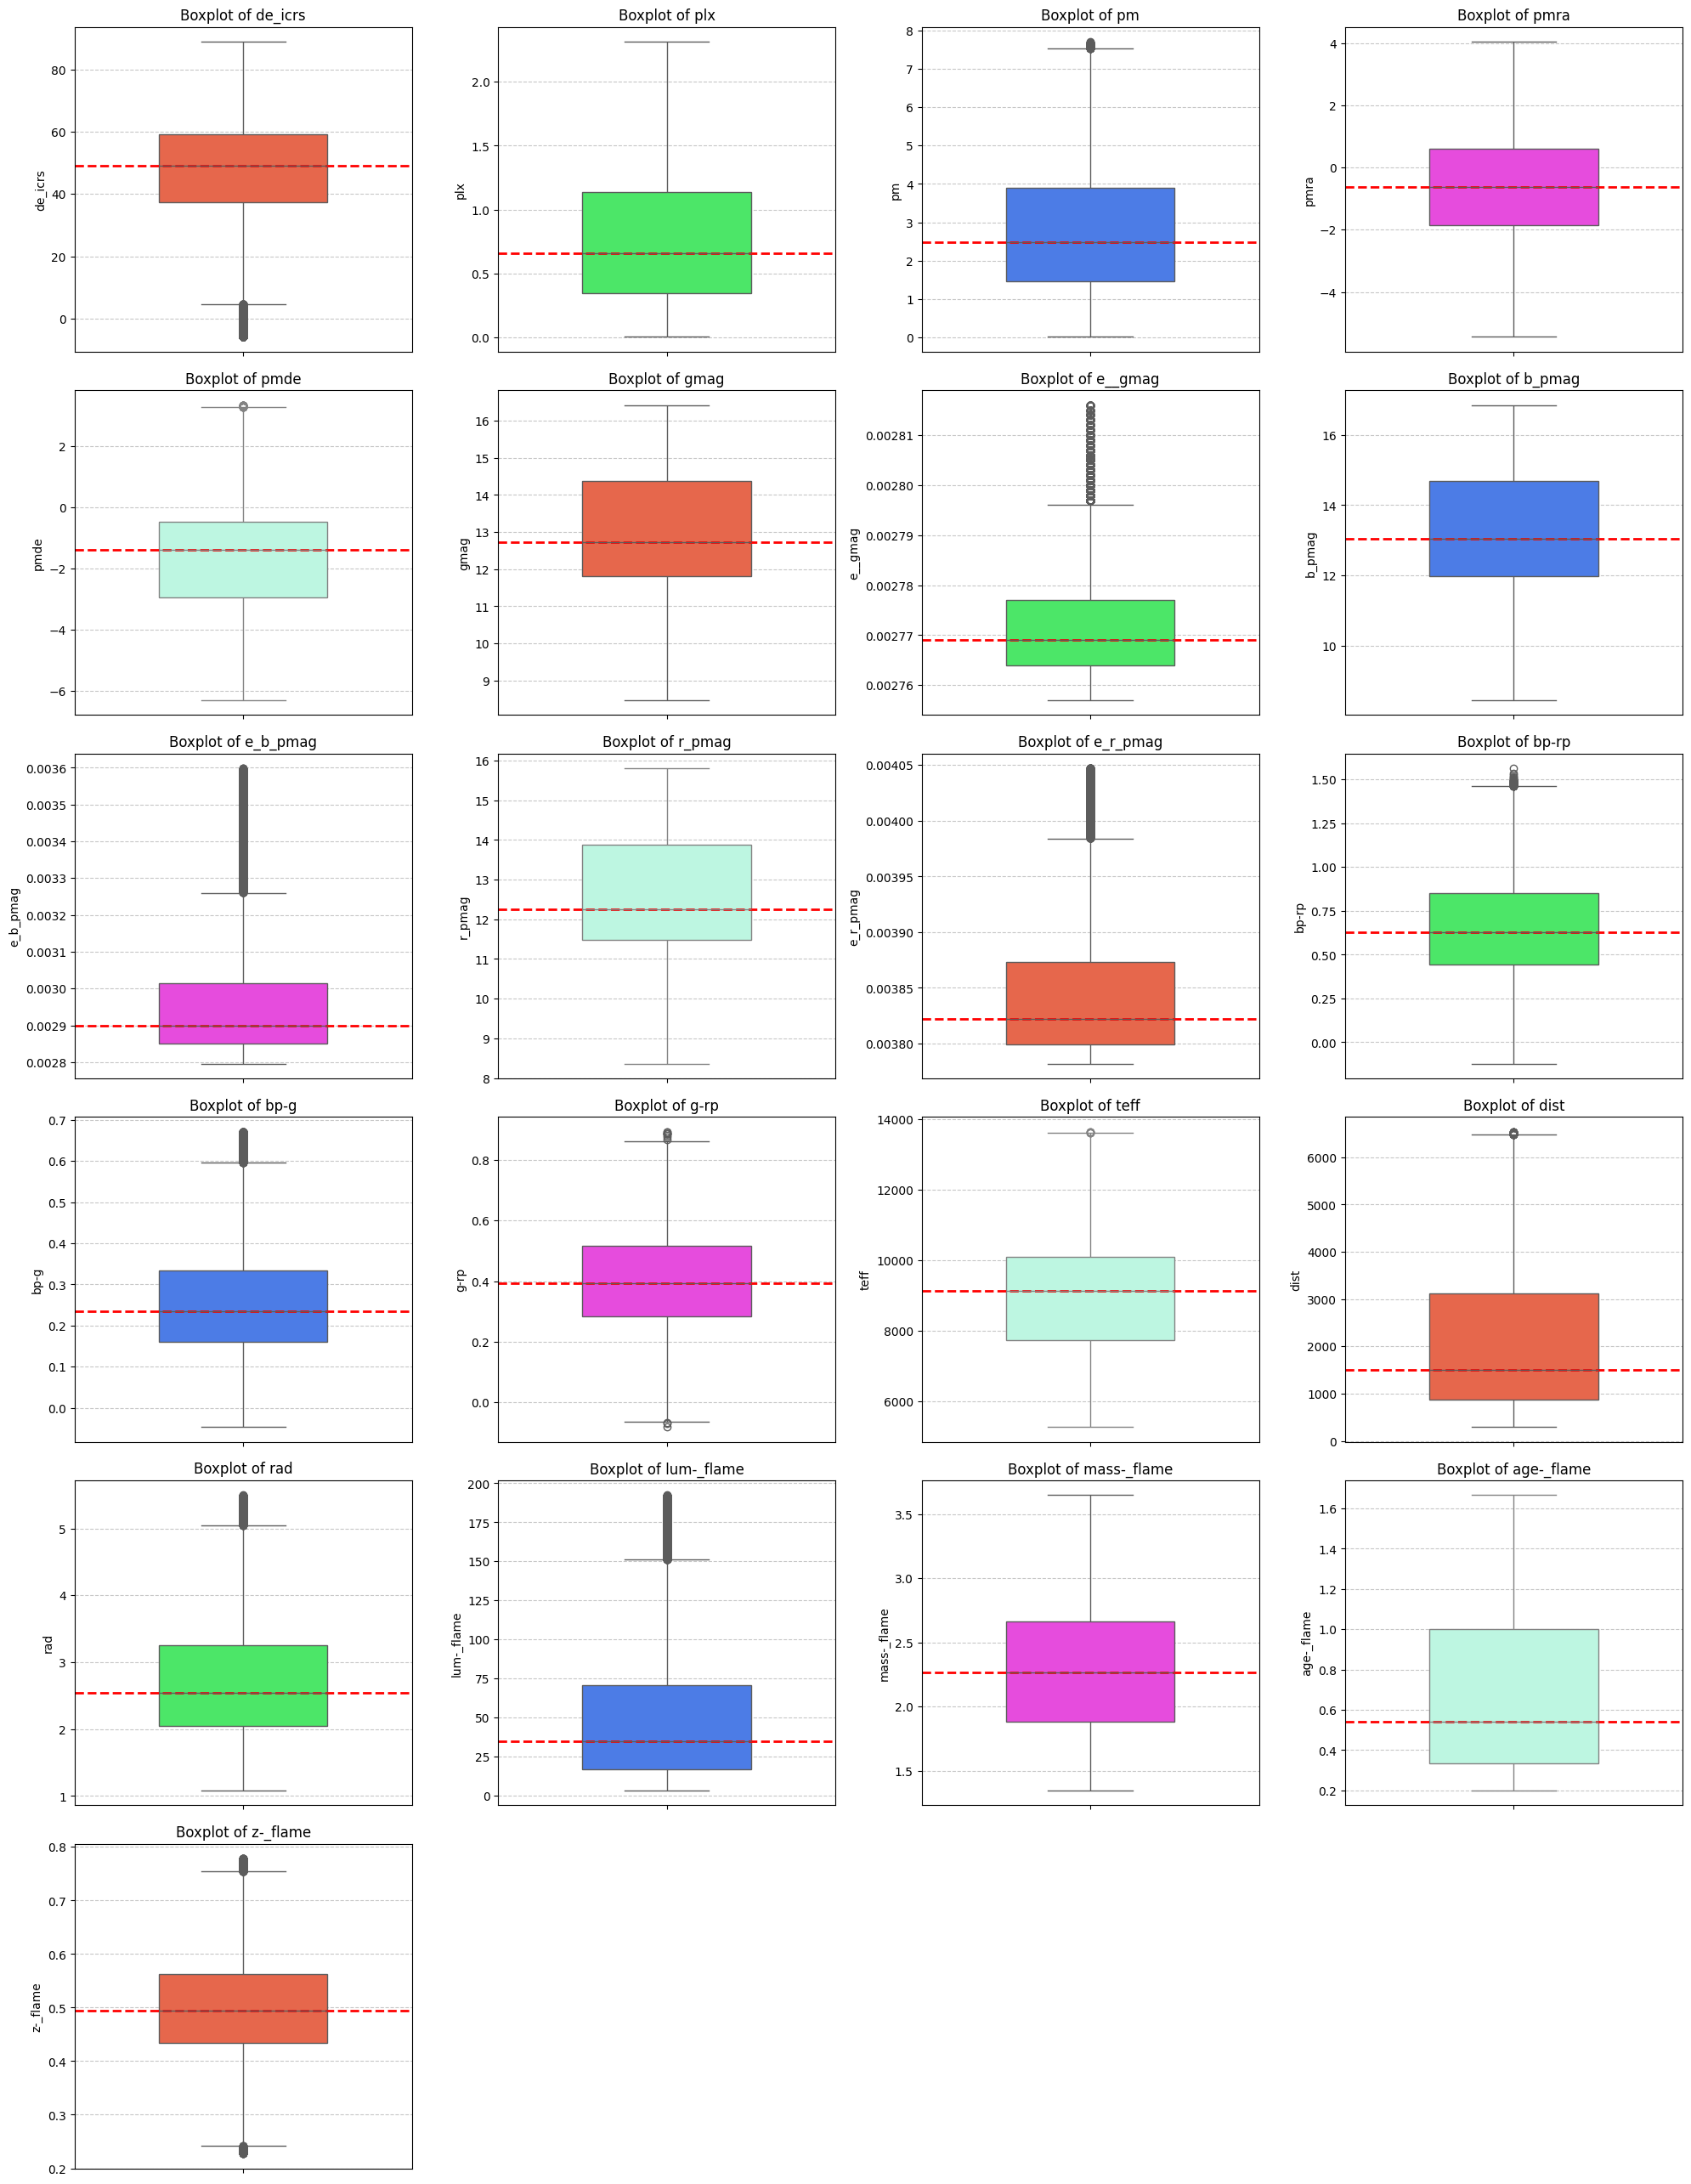

In [23]:
# Plotting the boxplots again to verify the removal of outliers
clr_map = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']
palette = sns.color_palette(clr_map * (len(columns_to_check) // len(clr_map) + 1))

plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(7, 4, i)  # Adjusting to a 7x4 grid for 26 columns
    sns.boxplot(y=clean_data_zscore[column], color=palette[i-1], width=0.5)
    plt.axhline(y=clean_data_zscore[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Encoding Target Feature

In [24]:
# Strip trailing spaces from the 'sp_type-els' column
clean_data_zscore['sp_type-els'] = clean_data_zscore['sp_type-els'].str.strip()

# Verify the unique values after stripping spaces
print("Unique values in 'sp_type-els' after stripping spaces:", clean_data_zscore['sp_type-els'].unique())


Unique values in 'sp_type-els' after stripping spaces: ['A' 'B']


In [25]:
clean_data_zscore['sp_type-els'] = clean_data_zscore['sp_type-els'].replace({'A': 0, 'B': 1})


In [26]:
clean_data_zscore.head(5)

,id,ra_icrs,de_icrs,source,plx,pm,pmra,pmde,gmag,e__gmag,...,bp-g,g-rp,teff,dist,rad,lum-_flame,mass-_flame,age-_flame,z-_flame,sp_type-els
14,15,47.508228,6.366162,4.430000e+15,2.1214,1.587,-1.577,-0.182,10.958096,0.002787,...,0.264290,0.428060,7674.4,504.3171,2.2636,13.646830,1.782,0.982,0.451245,0
36,41,50.123749,8.603639,1.110000e+16,0.7875,3.276,3.114,-1.017,13.315263,0.002776,...,0.348496,0.520893,7189.1,1113.0190,2.0449,11.051456,1.684,1.284,0.455684,0
37,42,50.120747,8.791082,1.110000e+16,1.6581,6.231,0.543,-6.207,11.438101,0.002794,...,0.320625,0.488811,7041.0,545.3607,2.2724,12.628493,1.723,1.348,0.442619,0
70,79,39.995624,8.040737,1.990000e+16,1.0011,5.031,3.928,-3.144,12.257379,0.002782,...,0.174462,0.301917,7610.3,1030.4235,2.1114,12.003242,1.738,0.994,0.473932,0
88,101,39.903785,13.339954,2.670000e+16,1.7688,7.537,-4.545,-6.013,11.208368,0.002775,...,0.142201,0.258627,8366.7,581.8110,1.7502,12.363825,1.809,0.440,0.579508,0


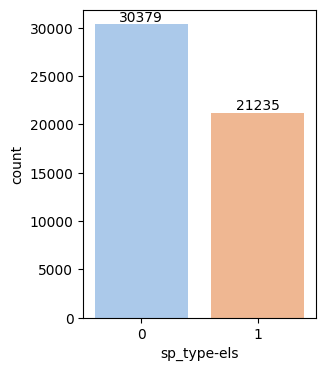

In [27]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='sp_type-els',data=clean_data_zscore,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#### Handle Dataset Balancing Use using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
# Separate features and target
X = clean_data_zscore.drop(columns=['sp_type-els'],axis=1)
y = clean_data_zscore['sp_type-els']

scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




In [29]:
print(f"Outcome class size before SMOTE: {y.value_counts()}")
print(f"Outcome class size After SMOTE: {y_resampled.value_counts()}")

Outcome class size before SMOTE: sp_type-els
0    30379
1    21235
Name: count, dtype: int64
Outcome class size After SMOTE: sp_type-els
0    30379
1    30379
Name: count, dtype: int64


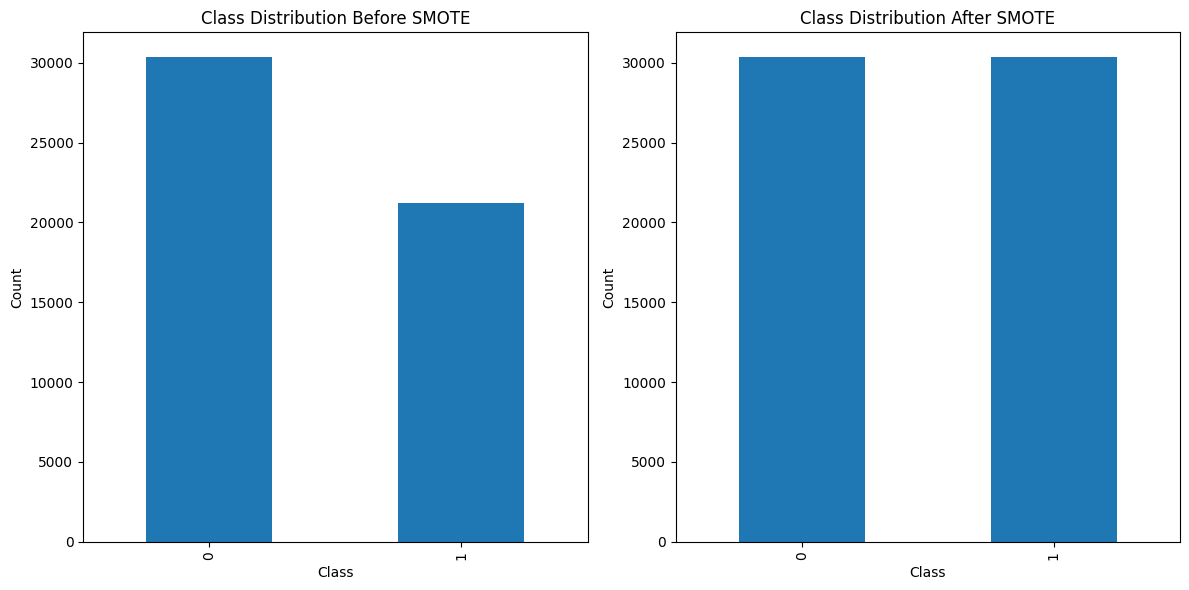

In [30]:
# Plot class distributions before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot before SMOTE
y.value_counts().plot(kind='bar', ax=ax[0], title='Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Plot after SMOTE
y_resampled.value_counts().plot(kind='bar', ax=ax[1], title='Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
X_resampled

,id,ra_icrs,de_icrs,source,plx,pm,pmra,pmde,gmag,e__gmag,...,bp-rp,bp-g,g-rp,teff,dist,rad,lum-_flame,mass-_flame,age-_flame,z-_flame
0,15,47.508228,6.366162,4.430000e+15,2.121400,1.587000,-1.577000,-0.182000,10.958096,0.002787,...,0.692349,0.264290,0.428060,7674.400000,504.317100,2.263600,13.646830,1.782000,0.982000,0.451245
1,41,50.123749,8.603639,1.110000e+16,0.787500,3.276000,3.114000,-1.017000,13.315263,0.002776,...,0.869390,0.348496,0.520893,7189.100000,1113.019000,2.044900,11.051456,1.684000,1.284000,0.455684
2,42,50.120747,8.791082,1.110000e+16,1.658100,6.231000,0.543000,-6.207000,11.438101,0.002794,...,0.809436,0.320625,0.488811,7041.000000,545.360700,2.272400,12.628493,1.723000,1.348000,0.442619
3,79,39.995624,8.040737,1.990000e+16,1.001100,5.031000,3.928000,-3.144000,12.257379,0.002782,...,0.476379,0.174462,0.301917,7610.300000,1030.423500,2.111400,12.003242,1.738000,0.994000,0.473932
4,101,39.903785,13.339954,2.670000e+16,1.768800,7.537000,-4.545000,-6.013000,11.208368,0.002775,...,0.400828,0.142201,0.258627,8366.700000,581.811000,1.750200,12.363825,1.809000,0.440000,0.579508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60753,104146,76.982059,36.998074,1.870000e+17,0.455444,2.844140,0.831681,-2.706526,13.039289,0.002763,...,0.604659,0.224822,0.379837,11581.869276,2537.596509,3.391544,127.765118,3.117973,0.607661,0.516218
60754,152105,43.398076,61.835267,4.660000e+17,1.220838,1.372110,-1.210283,0.564796,12.135476,0.002779,...,0.543792,0.201732,0.342060,10278.253115,1345.841315,2.254071,33.974727,2.366455,0.804841,0.524480
60755,142273,58.762448,55.342241,4.450000e+17,0.315311,1.020086,-0.597620,-0.815910,14.835499,0.002764,...,1.186413,0.507027,0.679386,10008.779156,3470.652286,3.734890,83.523987,2.724012,0.342158,0.427177
60756,110966,76.177674,40.905411,2.010000e+17,0.286335,1.477132,-0.126371,-1.456027,13.763421,0.002779,...,0.534703,0.194205,0.340498,11305.797455,3179.855422,2.890958,119.995030,3.057796,0.258632,0.538455


#### Spilt Data Set With Train And Validation

In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

# Verify the splits
print("Training set class distribution:\n", y_train.value_counts())
print("Validation set class distribution:\n", y_val.value_counts())


Training set class distribution:
 sp_type-els
0    24332
1    24274
Name: count, dtype: int64
Validation set class distribution:
 sp_type-els
1    6105
0    6047
Name: count, dtype: int64


#### Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_val = scaler.fit_transform(X_val)

## Build KNN Model

In [42]:
def evaluate_model(model, x_val, y_val):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_val)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_val, y_pred)
    prec = metrics.precision_score(y_val, y_pred)
    rec = metrics.recall_score(y_val, y_pred)
    f1 = metrics.f1_score(y_val, y_pred)
    kappa = metrics.cohen_kappa_score(y_val, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_val)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_proba)
    auc = metrics.roc_auc_score(y_val, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_val, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}


In [ ]:
pca = PCA(n_components = None)
dfx_pca = pca.fit(X_train)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_>0.10)

In [ ]:
n_components

In [ ]:
pca = PCA(n_components = n_components)
iris_pca = pca.fit_transform(X_resampled)

In [ ]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(iris_pca)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': randint(1, 20),  # random integers from 1 to 20
    'weights': ['uniform', 'distance'],  # try different weighting schemes
    'metric': ['euclidean', 'manhattan']  # try different distance metrics
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train,y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_score = random_search.best_score_
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.9999177039399239


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Step 2: Training the KNN model
knn_model_imp = KNeighborsClassifier(n_neighbors=1)
knn_model_imp.fit(X_train_scaled, y_train)

# Step 3: Scaling the validation data using the fitted scaler
X_val_scaled = scaler.transform(X_val)

# Evaluate Model
knn_model_imp_eval = evaluate_model(knn_model_imp, X_val_scaled, y_val)

# Print result
print('Accuracy:', knn_model_imp_eval['acc'])
print('Precision:', knn_model_imp_eval['prec'])
print('Recall:', knn_model_imp_eval['rec'])
print('F1 Score:', knn_model_imp_eval['f1'])
print('Cohens Kappa Score:', knn_model_imp_eval['kappa'])
print('Area Under Curve:', knn_model_imp_eval['auc'])


Accuracy: 0.9995885450954576
Precision: 0.9993451211525868
Recall: 0.9998361998361999
F1 Score: 0.9995906001801359
Cohens Kappa Score: 0.9991770695049588
Area Under Curve: 0.9995873574011495


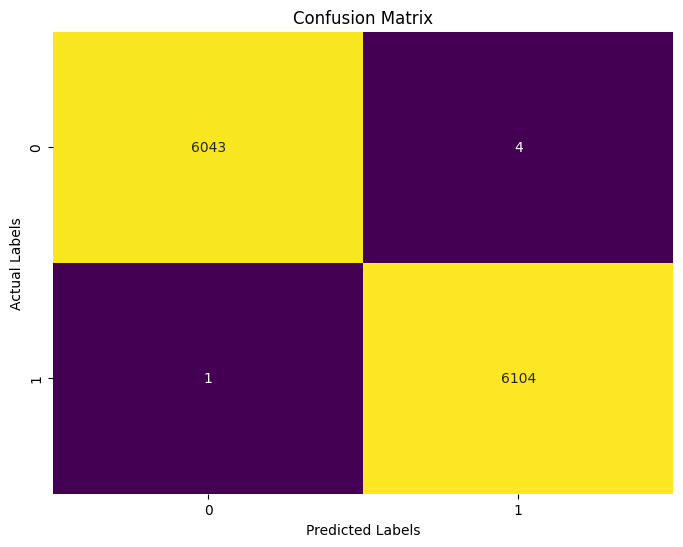

In [ ]:
y_pred =knn_model_imp.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Predict On Test Data Set

In [ ]:
# Load the test data
test_data = pd.read_csv('G:/shg/Datasets/dataGaia_AB_unknown.csv')


In [ ]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(test_data)
print(test_data.columns)

Index(['id', 'unnamed: 0', 'ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra',
       'pmde', 'gmag', 'e__gmag', 'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag',
       'grv_smag', 'e_grv_smag', 'bp-rp', 'bp-g', 'g-rp', 'pscol', 'teff',
       'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame'],
      dtype='object')


In [ ]:
test_data.drop(columns=['pscol'], inplace=True)
test_data.drop(columns=['grv_smag'], inplace=True)
test_data.drop(columns=['e_grv_smag'], inplace=True)
test_data.drop(columns=['unnamed: 0'], inplace=True)

In [ ]:
# Save the 'id' column for later use
ids = test_data['id']



# Fill missing values with the rounded mean for specific columns
columns_to_fill = ['age-_flame', 'mass-_flame', 'lum-_flame', 'z-_flame']
for col in columns_to_fill:
    mean_value = test_data[col].mean()
    rounded_mean_value = round(mean_value)
    test_data[col].fillna(rounded_mean_value, inplace=True)

# Step 1: Scaling the test data using the previously fitted scaler
X_test_scaled = scaler.transform(test_data)

# Step 2: Predicting the target feature for the test dataset
y_test_pred = knn_model_imp.predict(X_test_scaled)

# Convert numerical predictions to 'A' and 'B'
predicted_labels = ['A' if pred == 0 else 'B' for pred in y_test_pred]

# Step 3: Save the predictions along with IDs to a CSV file
output_df = pd.DataFrame({'id': ids, 'SpType-ELS': predicted_labels})
output_df.to_csv('G:/shg/Datasets/predicted_data_1.csv', index=False)

print('Predictions saved to G:/shg/Datasets/predicted_data_1.csv')

Predictions saved to G:/shg/Datasets/predicted_data_1.csv


## Build Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11,12,13]
min_samples_split=[1,9,11,12,13,15,16]
min_samples_leaf=[1,3,7,9,10,12,16]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
param=dict(criterion='criterion',max_depth='max_depth', min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [ ]:
from sklearn.model_selection import GridSearchCV
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=0)
grid.fit(X_train,y_train)

In [ ]:
#best parameters that achieves higher score
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
dt_tuned_model=DecisionTreeClassifier(criterion= 'gini',
 max_depth=11,
 min_samples_leaf= 1,
 min_samples_split= 9)
dt_tuned_model.fit(X_train,y_train)

In [ ]:
from sklearn import tree
# Create a figure to plot the tree
fig = plt.figure(figsize=(20,10))

# Plot the decision tree
_ = tree.plot_tree(dt_tuned_model,
                   feature_names=clean_data_zscore.columns,  # Use the column names from your training data
                   class_names=['A', 'B'],  # Replace with actual class names if different
                   filled=True)

# Display the plot
plt.show()

In [43]:
# Evaluate Model
dtree_eval = evaluate_model(dt_tuned_model, X_val, y_val)

# Print result
print('Accuracy:', dtree_eval['acc'])
print('Precision:', dtree_eval['prec'])
print('Recall:', dtree_eval['rec'])
print('F1 Score:', dtree_eval['f1'])
print('Cohens Kappa Score:', dtree_eval['kappa'])
print('Area Under Curve:', dtree_eval['auc'])

Accuracy: 0.9995062541145491
Precision: 1.0
Recall: 0.999017199017199
F1 Score: 0.9995083579154376
Cohens Kappa Score: 0.999012490387587
Area Under Curve: 0.9995085995085995


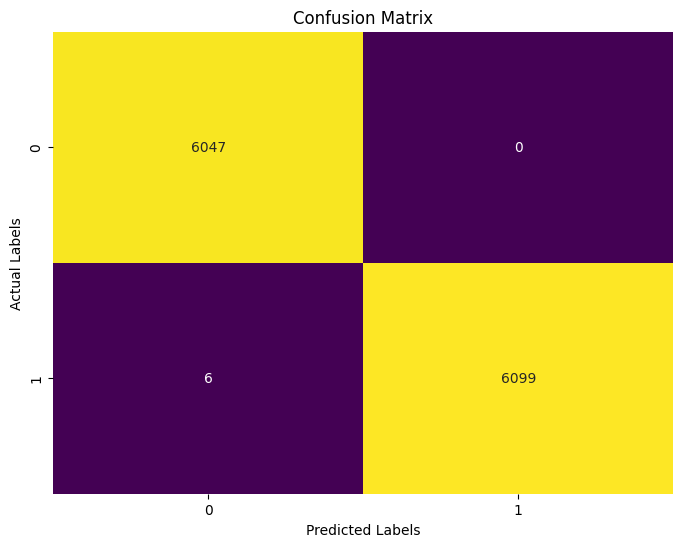

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt_tuned_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Load the test data
test_data = pd.read_csv('G:/shg/Datasets/dataGaia_AB_unknown.csv')

In [46]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(test_data)
print(test_data.columns)

Index(['id', 'unnamed: 0', 'ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra',
       'pmde', 'gmag', 'e__gmag', 'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag',
       'grv_smag', 'e_grv_smag', 'bp-rp', 'bp-g', 'g-rp', 'pscol', 'teff',
       'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame'],
      dtype='object')


In [47]:
test_data.drop(columns=['pscol'], inplace=True)
test_data.drop(columns=['grv_smag'], inplace=True)
test_data.drop(columns=['e_grv_smag'], inplace=True)
test_data.drop(columns=['unnamed: 0'], inplace=True)

In [48]:
# Save the 'id' column for later use
ids = test_data['id']



# Fill missing values with the rounded mean for specific columns
columns_to_fill = ['age-_flame', 'mass-_flame', 'lum-_flame', 'z-_flame']
for col in columns_to_fill:
    mean_value = test_data[col].mean()
    rounded_mean_value = round(mean_value)
    test_data[col].fillna(rounded_mean_value, inplace=True)

# Step 1: Scaling the test data using the previously fitted scaler
X_test_scaled = scaler.transform(test_data)

# Step 2: Predicting the target feature for the test dataset
y_test_pred = dt_tuned_model.predict(X_test_scaled)

# Convert numerical predictions to 'A' and 'B'
predicted_labels = ['A' if pred == 0 else 'B' for pred in y_test_pred]

# Step 3: Save the predictions along with IDs to a CSV file
output_df = pd.DataFrame({'id': ids, 'SpType-ELS': predicted_labels})
output_df.to_csv('G:/shg/Datasets/predicted_data_tree.csv', index=False)

print('Predictions saved to G:/shg/Datasets/predicted_data_tree.csv')

Predictions saved to G:/shg/Datasets/predicted_data_tree.csv


## Build RandomForest Algorithm

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter distribution for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300,400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}


In [ ]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Perform RandomizedSearchCV
randomized_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
# Get the best model
best_rf_model = randomized_search_rf.best_estimator_

# Make predictions on the test set
rf_predicted = best_rf_model.predict(X_val)

# Calculate accuracy
rf_acc_score = accuracy_score(y_val, rf_predicted)

In [ ]:
# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_val, rf_predicted))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6047
           1       1.00      1.00      1.00      6105

    accuracy                           1.00     12152
   macro avg       1.00      1.00      1.00     12152
weighted avg       1.00      1.00      1.00     12152



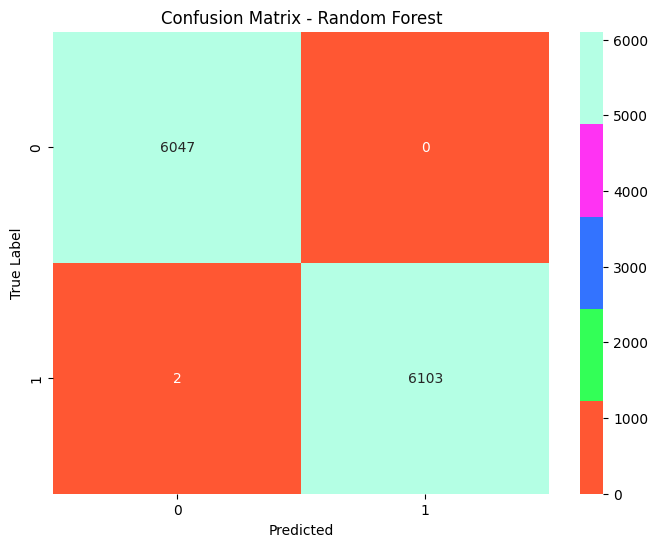

In [ ]:
# Calculate confusion matrix
y_pred_prob_rf = best_rf_model.predict_proba(X_val)[:, 1]

cm = confusion_matrix(y_val, (y_pred_prob_rf > 0.5).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=clr_map, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

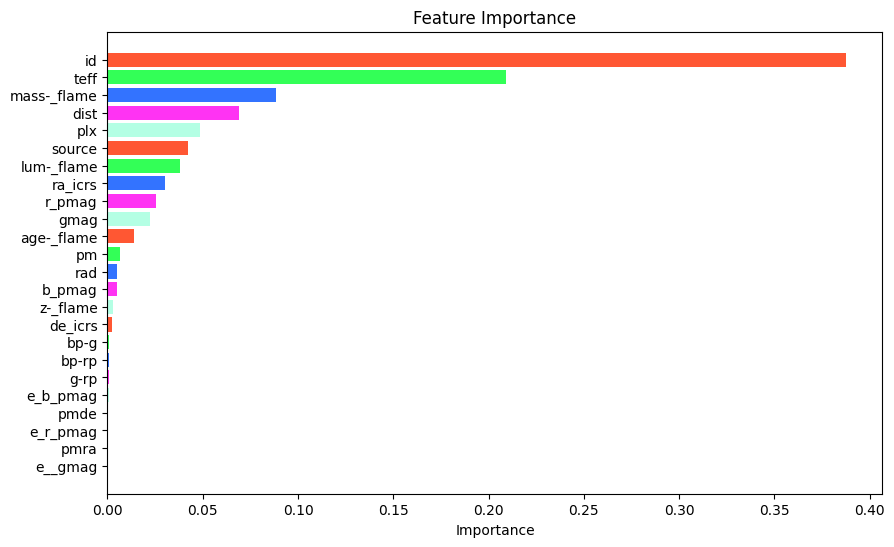

In [ ]:
feature_importance_values = best_rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importance_values})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=clr_map)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Load the test data
test_data = pd.read_csv('G:/shg/Datasets/dataGaia_AB_unknown.csv')

In [ ]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(test_data)
print(test_data.columns)

Index(['id', 'unnamed: 0', 'ra_icrs', 'de_icrs', 'source', 'plx', 'pm', 'pmra',
       'pmde', 'gmag', 'e__gmag', 'b_pmag', 'e_b_pmag', 'r_pmag', 'e_r_pmag',
       'grv_smag', 'e_grv_smag', 'bp-rp', 'bp-g', 'g-rp', 'pscol', 'teff',
       'dist', 'rad', 'lum-_flame', 'mass-_flame', 'age-_flame', 'z-_flame'],
      dtype='object')


In [ ]:
test_data.drop(columns=['pscol'], inplace=True)
test_data.drop(columns=['grv_smag'], inplace=True)
test_data.drop(columns=['e_grv_smag'], inplace=True)
test_data.drop(columns=['unnamed: 0'], inplace=True)

In [ ]:
# Save the 'id' column for later use
ids = test_data['id']



# Fill missing values with the rounded mean for specific columns
columns_to_fill = ['age-_flame', 'mass-_flame', 'lum-_flame', 'z-_flame']
for col in columns_to_fill:
    mean_value = test_data[col].mean()
    rounded_mean_value = round(mean_value)
    test_data[col].fillna(rounded_mean_value, inplace=True)

# Step 1: Scaling the test data using the previously fitted scaler
X_test_scaled = scaler.transform(test_data)

# Step 2: Predicting the target feature for the test dataset
y_test_pred = best_rf_model.predict(X_test_scaled)

# Convert numerical predictions to 'A' and 'B'
predicted_labels = ['A' if pred == 0 else 'B' for pred in y_test_pred]

# Step 3: Save the predictions along with IDs to a CSV file
output_df = pd.DataFrame({'id': ids, 'SpType-ELS': predicted_labels})
output_df.to_csv('G:/shg/Datasets/predicted_data_random.csv', index=False)

print('Predictions saved to G:/shg/Datasets/predicted_data_random.csv')

Predictions saved to G:/shg/Datasets/predicted_data_random.csv
